### 필수과제 1
- 타이타닉 변수들을 바꿔서 시각화 후에 어떤 식으로 과적합이 되는지
- 타이타닉 변수 인코딩 등 전처리해서 시각화를 해보시는 것도 추천드립니다.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
tt = sns.load_dataset("titanic")

In [4]:
tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
tt.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 결측치 확인
tt.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- age는 중앙값, embarked와 embark_town은 최빈값으로 대체
- deck는 결측치가 너무 많으므로 제거

In [8]:
import statistics as stat

print(np.nanmedian(tt.age))
print(stat.mode(tt.embarked))
print(stat.mode(tt.embark_town))

28.0
S
Southampton


In [9]:
tt["age"].fillna(28.0, inplace=True)
tt["embarked"].fillna("S", inplace=True)
tt["embark_town"].fillna("Southampton", inplace=True)

In [10]:
tt.drop(["deck"], axis=1, inplace=True)

In [11]:
# 결측치가 성공적으로 제거됨
tt.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
# 범주형 자료에 대해 레이블 인코딩 (중복 정보 제외)
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
tt["sex"] = encoder1.fit_transform(tt["sex"])
tt["embarked"] = encoder2.fit_transform(tt["embarked"])

In [13]:
# 성공적으로 인코딩됨
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int32   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int32   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int32(2), int64(4), object(3)
memory usage: 72.5+ KB


In [14]:
# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # train data scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap="rainbow", edgecolor="k", 
               clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 train data model 학습
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, 
                           levels=np.arange(n_classes + 1) - 0.5, 
                           cmap="rainbow", clim=(y.min(), y.max()), zorder=1)

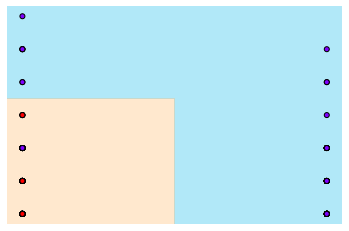

In [15]:
# 학습 진행하기
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["adult_male","parch"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["adult_male","parch"]], tt["survived"])

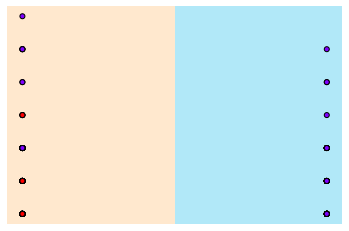

In [16]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(tt[["adult_male","parch"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["adult_male","parch"]], tt["survived"])

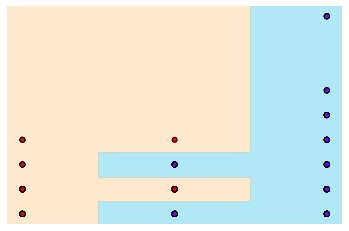

In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["pclass","sibsp"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["pclass","sibsp"]], tt["survived"])

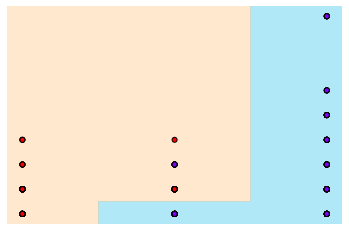

In [18]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(tt[["pclass","sibsp"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["pclass","sibsp"]], tt["survived"])

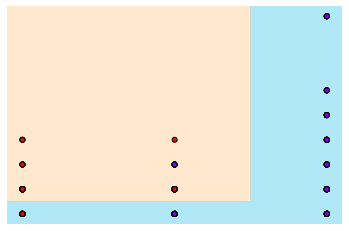

In [19]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(tt[["pclass","sibsp"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["pclass","sibsp"]], tt["survived"])

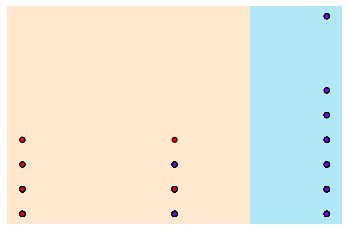

In [20]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(tt[["pclass","sibsp"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["pclass","sibsp"]], tt["survived"])

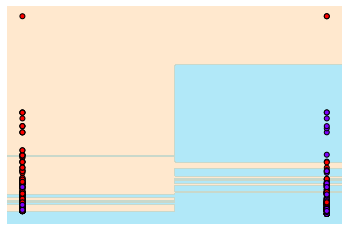

In [21]:
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["adult_male","fare"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["adult_male","fare"]], tt["survived"])

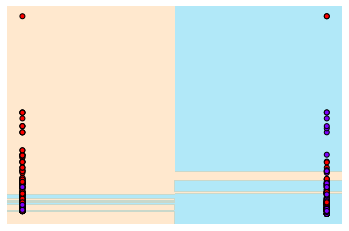

In [22]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["adult_male","fare"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["adult_male","fare"]], tt["survived"])

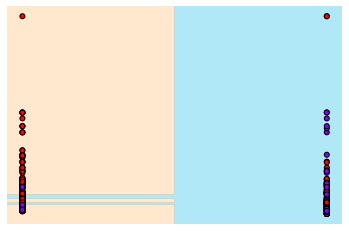

In [23]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=5, min_samples_leaf=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["adult_male","fare"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["adult_male","fare"]], tt["survived"])

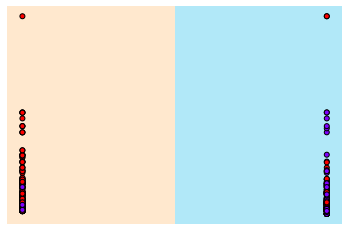

In [24]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=2, min_samples_leaf=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["adult_male","fare"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["adult_male","fare"]], tt["survived"])

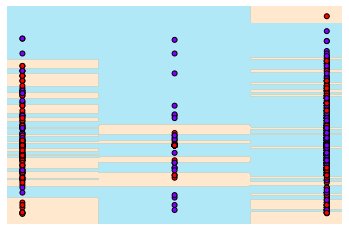

In [25]:
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["embarked","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["embarked","age"]], tt["survived"])

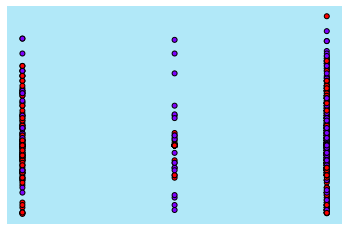

In [26]:
dt_clf = DecisionTreeClassifier(random_state=156, ccp_alpha=0.5)

X_train, X_test, y_train, y_test = train_test_split(tt[["embarked","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["embarked","age"]], tt["survived"])

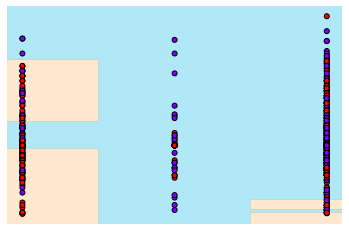

In [27]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["embarked","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["embarked","age"]], tt["survived"])

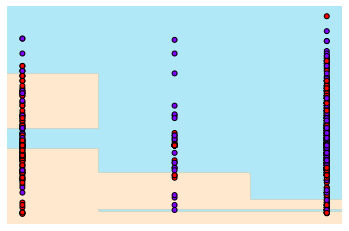

In [28]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=5, min_samples_leaf=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["embarked","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["embarked","age"]], tt["survived"])

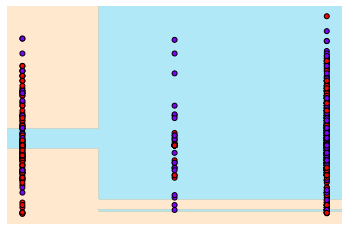

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=4, min_samples_leaf=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["embarked","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["embarked","age"]], tt["survived"])

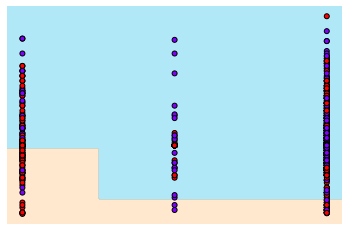

In [30]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3, min_samples_leaf=5)

X_train, X_test, y_train, y_test = train_test_split(tt[["embarked","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["embarked","age"]], tt["survived"])

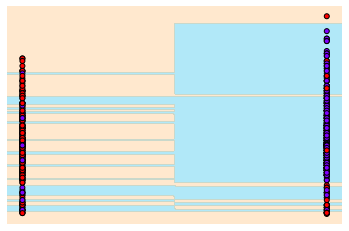

In [31]:
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["sex","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

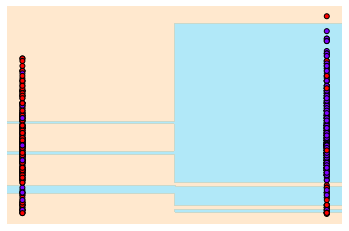

In [32]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=5, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(tt[["sex","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

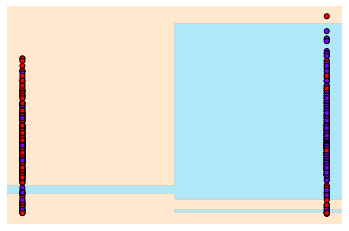

In [33]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=4, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(tt[["sex","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

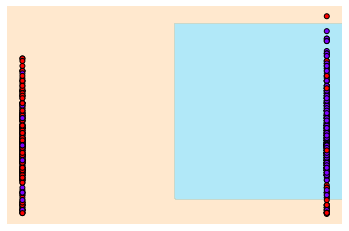

In [34]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(tt[["sex","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

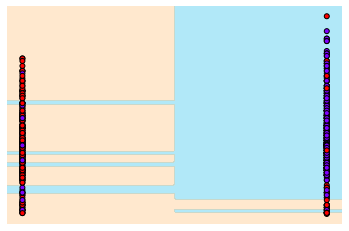

In [35]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=7, min_samples_leaf=5, 
                                min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(tt[["sex","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

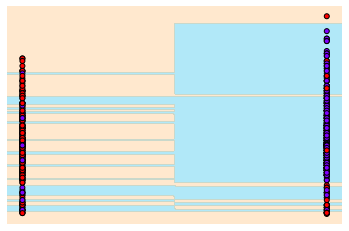

In [36]:
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["alone","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

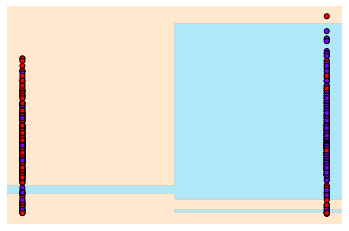

In [37]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(tt[["sex","age"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, tt[["sex","age"]], tt["survived"])

In [38]:
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(tt[["pclass","fare","sex","age","embarked","parch","sibsp","alone"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.746268656716418


In [39]:
from sklearn.model_selection import GridSearchCV

params = { 
    "max_depth": [1,2,3,4,5], 
    "min_samples_split": [3,4,5,6,7,8,9,10], 
    "min_samples_leaf": [1,2,3,4,5], 
    "max_features": [1,2,3,4,5,6,7,8]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
print("평균 정확도:{0:.4f}".format(grid_cv.best_score_))
print("최적의 하이퍼파라미터", grid_cv.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
평균 정확도:0.8122
최적의 하이퍼파라미터 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [40]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3, max_features=2,
                                min_samples_leaf=2, min_samples_split=7)

X_train, X_test, y_train, y_test = train_test_split(tt[["pclass","fare","sex","age","embarked","parch","sibsp","alone"]], 
                                                    tt["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7835820895522388
